In [5]:
!pip install torch

  Using cached torch-2.1.1-cp310-none-macosx_11_0_arm64.whl.metadata (25 kB)
  Using cached filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached fsspec-2023.12.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Using cached torch-2.1.1-cp310-none-macosx_11_0_arm64.whl (59.6 MB)
Using cached filelock-3.13.1-py3-none-any.whl (11 kB)
Using cached fsspec-2023.12.1-py3-none-any.whl (168 kB)
Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)


In [6]:
!pip install torchvision

  Using cached torchvision-0.16.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.6 kB)
Using cached torchvision-0.16.1-cp310-cp310-macosx_11_0_arm64.whl (1.5 MB)


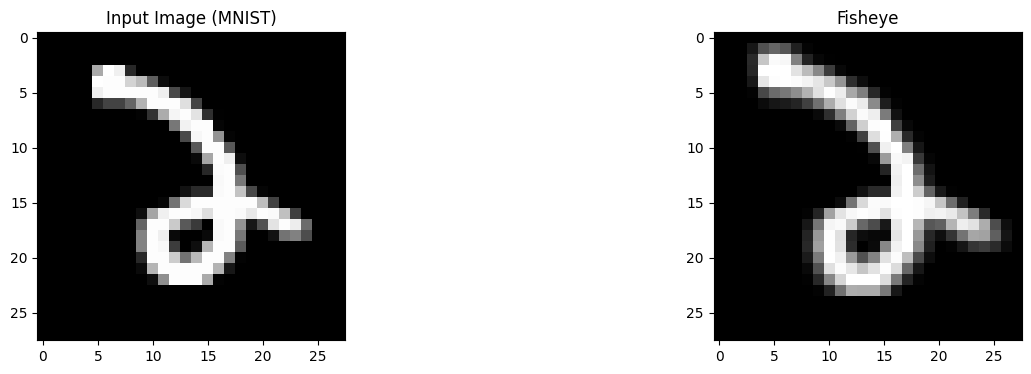

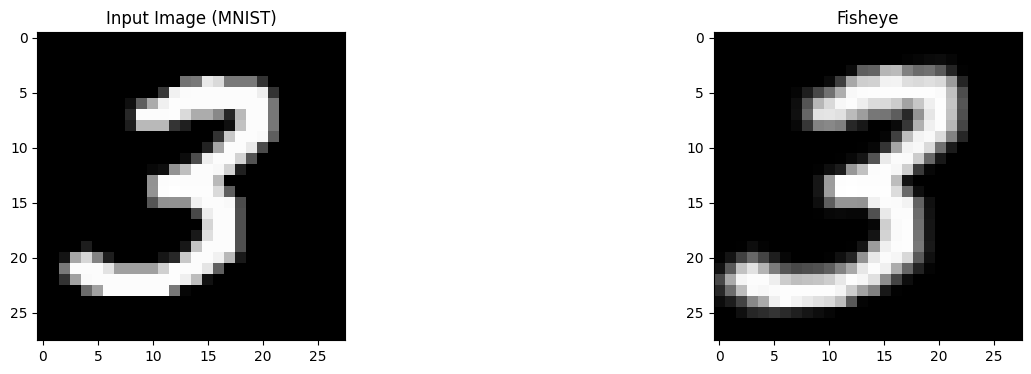

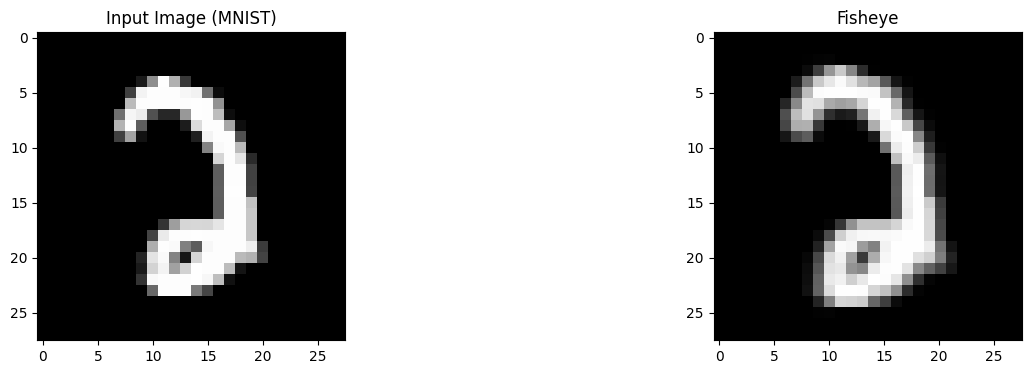

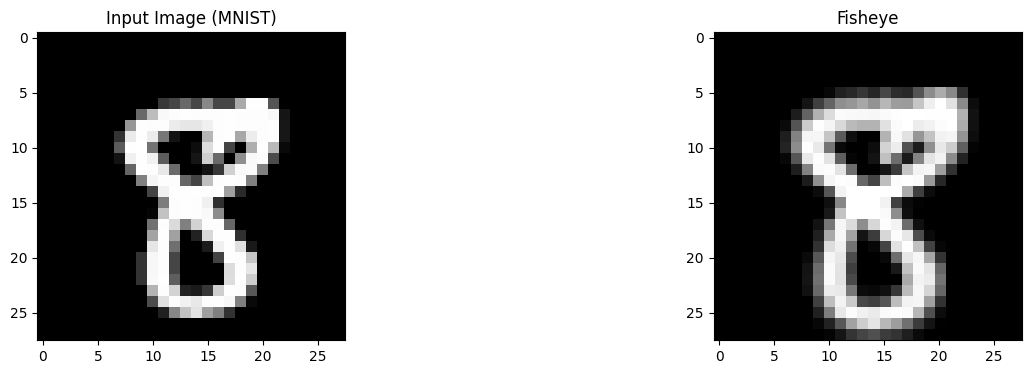

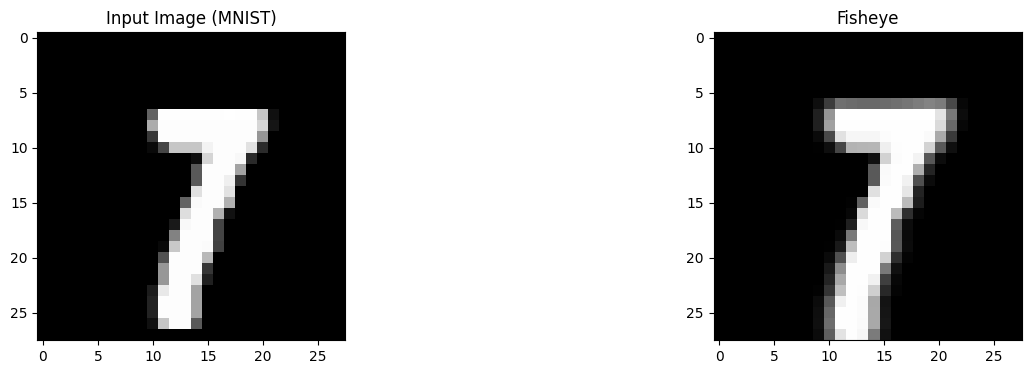

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision import datasets

(images, labels), (_, _) = mnist.load_data()
images.shape

flattened_images = images.reshape(images.shape[0], -1)
# Fisheye Transformation
def get_of_fisheye(height, width, center, magnitude):
    xx, yy = torch.linspace(-1, 1, width), torch.linspace(-1, 1, height)
    gridy, gridx = torch.meshgrid(yy, xx)   # create identity grid
    grid = torch.stack([gridx, gridy], dim=-1)
    d = center - grid         # calculate the distance(cx - x, cy - y) 
    d_sum = torch.sqrt((d**2).sum(axis=-1)) # sqrt((cx-x)**2 + (cy-y)**2)
    grid += d * d_sum.unsqueeze(-1) * magnitude # calculate dx & dy and add to original values
    return grid.unsqueeze(0)    # unsqueeze(0) since the grid needs to be 4D.
    
# Utility Functions
# Create Image Batch
def get_image_batch(img):
    transform = transforms.Compose([transforms.ToTensor()])
    tfms_img = transform(img)
    imgs = torch.unsqueeze(tfms_img, dim=0)
    return imgs

# Plotting Function
def plot(img, fisheye_output):
    fisheye_out = fisheye_output[0].numpy()
    fisheye_out = np.moveaxis(fisheye_out, 0, -1)

    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    ax[0].imshow(img, cmap='gray')
    ax[1].imshow(fisheye_out, cmap='gray')

    ax[0].set_title('Input Image (MNIST)')
    ax[1].set_title('Fisheye')
    plt.show()

# Download MNIST dataset
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_loader = torch.utils.data.DataLoader(mnist_dataset, shuffle=True)

# Get fisheye and horizontal wave grids
H, W = 28, 28
fisheye_grid = get_of_fisheye(H, W, torch.tensor([0, 0]), 0.1)

# Apply transformations to each image in the MNIST dataset
count = 0
for img, _ in mnist_loader:
    fisheye_output = F.grid_sample(img, fisheye_grid, align_corners=True)
    plot(img.squeeze().numpy(), fisheye_output)
    count += 1
    if count == 5:
        break

In [65]:
# Collect transformed fisheye images
fisheye_images = []

# Apply transformations and collect images
for img, _ in mnist_loader:
    fisheye_output = F.grid_sample(img, fisheye_grid, align_corners=True)
    fisheye_images.append(fisheye_output.squeeze().numpy())

In [66]:
transformed_images = np.array(fisheye_images)
images = np.array(images)

In [53]:
# Collect transformed fisheye images
fisheye_images_0_1 = []

# Apply transformations and collect images
for img, _ in mnist_loader:
    fisheye_output_0_1 = F.grid_sample(img, get_of_fisheye(H, W, torch.tensor([0, 0]), 0.1), align_corners=True)
    fisheye_images.append(fisheye_output.squeeze().numpy())

In [122]:
images_flat = images.reshape(images.shape[0], -1)

H, W = 28, 28

original_images = []
fisheye_images_0_1 = []
fisheye_images_0_2 = []
fisheye_images_0_3 = []
fisheye_images_0_4 = []
fisheye_images_0_5 = []

# Apply transformations and collect images
for img, _ in mnist_loader:
    original_images.append((F.grid_sample(torch.tensor(img), get_of_fisheye(H, W, torch.tensor([0, 0]), 0), align_corners=True)).squeeze().numpy())
    fisheye_images_0_1.append((F.grid_sample(torch.tensor(img), get_of_fisheye(H, W, torch.tensor([0, 0]), 0.1), align_corners=True)).squeeze().numpy())
    fisheye_images_0_2.append((F.grid_sample(torch.tensor(img), get_of_fisheye(H, W, torch.tensor([0, 0]), 0.2), align_corners=True)).squeeze().numpy())
    fisheye_images_0_3.append((F.grid_sample(torch.tensor(img), get_of_fisheye(H, W, torch.tensor([0, 0]), 0.3), align_corners=True)).squeeze().numpy())
    fisheye_images_0_4.append((F.grid_sample(torch.tensor(img), get_of_fisheye(H, W, torch.tensor([0, 0]), 0.4), align_corners=True)).squeeze().numpy())
    fisheye_images_0_5.append((F.grid_sample(torch.tensor(img), get_of_fisheye(H, W, torch.tensor([0, 0]), 0.5), align_corners=True)).squeeze().numpy())

original_images = np.array(original_images)
transformed_images_0_1 = np.array(fisheye_images_0_1)
transformed_images_0_2 = np.array(fisheye_images_0_2)
transformed_images_0_3 = np.array(fisheye_images_0_3)
transformed_images_0_4 = np.array(fisheye_images_0_4)
transformed_images_0_5 = np.array(fisheye_images_0_5)

original_images_flat = original_images.reshape(original_images.shape[0], -1)
transformed_images_0_1_flat = transformed_images_0_1.reshape(transformed_images_0_1.shape[0], -1)
transformed_images_0_2_flat = transformed_images_0_2.reshape(transformed_images_0_2.shape[0], -1)
transformed_images_0_3_flat = transformed_images_0_3.reshape(transformed_images_0_3.shape[0], -1)
transformed_images_0_4_flat = transformed_images_0_4.reshape(transformed_images_0_4.shape[0], -1)
transformed_images_0_5_flat = transformed_images_0_5.reshape(transformed_images_0_5.shape[0], -1)

/var/folders/kk/rrn70w0j58l3gj1_ggmbkg5h0000gn/T/ipykernel_446/1173614397.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  original_images.append((F.grid_sample(torch.tensor(img), get_of_fisheye(H, W, torch.tensor([0, 0]), 0), align_corners=True)).squeeze().numpy())
/var/folders/kk/rrn70w0j58l3gj1_ggmbkg5h0000gn/T/ipykernel_446/1173614397.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  fisheye_images_0_1.append((F.grid_sample(torch.tensor(img), get_of_fisheye(H, W, torch.tensor([0, 0]), 0.1), align_corners=True)).squeeze().numpy())
/var/folders/kk/rrn70w0j58l3gj1_ggmbkg5h0000gn/T/ipykernel_446/1173614397.py:16: UserWarning: To copy construct from a tensor, it is recommended to u

In [123]:
U_orig, E_orig, V_t_orig = np.linalg.svd(original_images_flat, full_matrices=False)

# svd on fisheye
U_fish_0_1, E_fish_0_1, V_t_fish_0_1 = np.linalg.svd(transformed_images_0_1_flat, full_matrices=False)
U_fish_0_2, E_fish_0_2, V_t_fish_0_2 = np.linalg.svd(transformed_images_0_2_flat, full_matrices=False)
U_fish_0_3, E_fish_0_3, V_t_fish_0_3 = np.linalg.svd(transformed_images_0_3_flat, full_matrices=False)
U_fish_0_4, E_fish_0_4, V_t_fish_0_4 = np.linalg.svd(transformed_images_0_4_flat, full_matrices=False)
U_fish_0_5, E_fish_0_5, V_t_fish_0_5 = np.linalg.svd(transformed_images_0_5_flat, full_matrices=False)

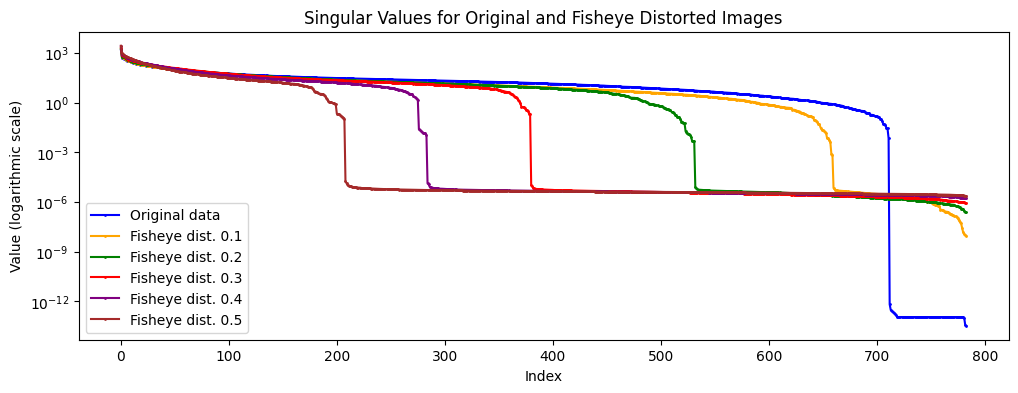

In [124]:
plt.figure(figsize=(12, 4))
plt.plot(E_orig, marker='o', color="blue", markersize=1, label="Original data")
plt.plot(E_fish_0_1, marker='o', color='orange', markersize=1, label="Fisheye dist. 0.1")
plt.plot(E_fish_0_2, marker='o', color='green', markersize=1, label="Fisheye dist. 0.2")
plt.plot(E_fish_0_3, marker='o', color='red', markersize=1, label="Fisheye dist. 0.3")
plt.plot(E_fish_0_4, marker='o', color='purple', markersize=1, label="Fisheye dist. 0.4")
plt.plot(E_fish_0_5, marker='o', color='brown', markersize=1, label="Fisheye dist. 0.5")
plt.title("Singular Values for Original and Fisheye Distorted Images")
plt.xlabel("Index")
plt.ylabel("Value (logarithmic scale)")
plt.yscale("log")
plt.legend()
plt.show()


In [132]:
def reconstruct_images(U, E, V_t, num_components):
    # Reconstruct images from the first `num_components` components
    reconstructed_images = np.dot(U[:, :num_components], np.dot(np.diag(E[:num_components]), V_t[:num_components, :]))
    return reconstructed_images

def plot_reconstructed_images(imgs, U, E, V, dist, num_components=50):
    reconstructed_images = reconstruct_images(U, E, V, num_components)
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    ax[0].imshow(imgs, cmap='gray')
    ax[1].imshow(reconstructed_images[0].reshape(28,28), cmap='gray')

    ax[0].set_title(f'Distortion: {dist}')
    ax[1].set_title(f'Reconstructed Image: {num_components} singular values')

    # decrease space between axes
    plt.subplots_adjust(wspace=0.1)
    plt.show()

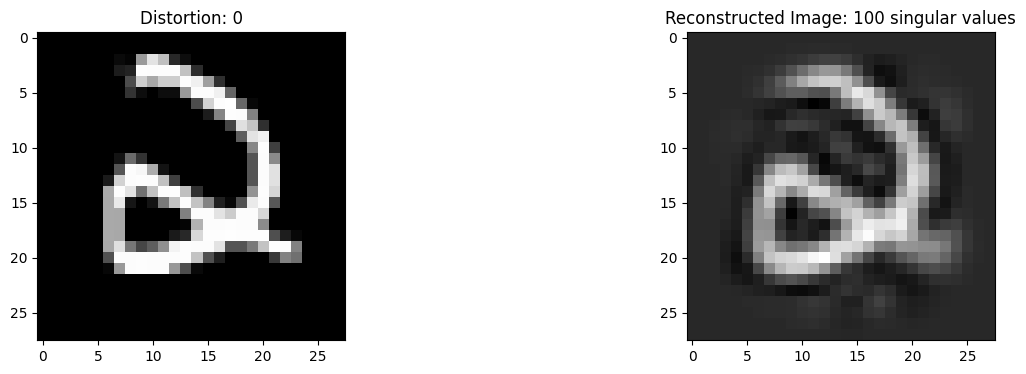

In [133]:
plot_reconstructed_images(original_images[0], U_orig, E_orig, V_t_orig, 0, 100)

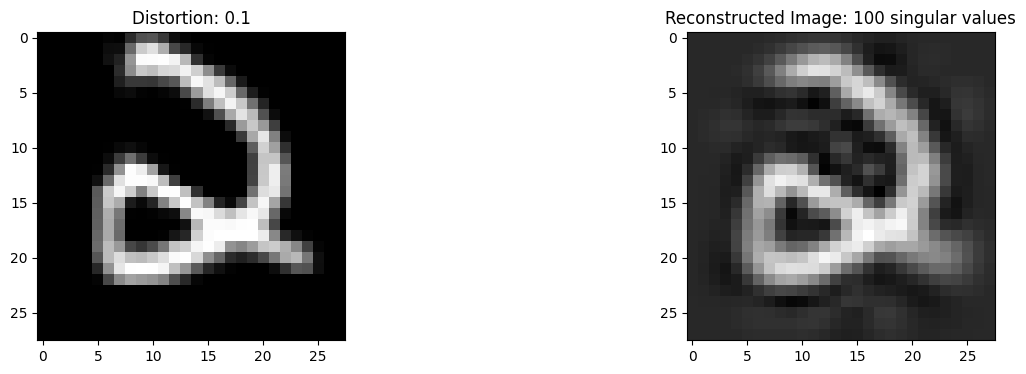

In [134]:
plot_reconstructed_images(transformed_images_0_1[0], U_fish_0_1, E_fish_0_1, V_t_fish_0_1, 0.1, 100)

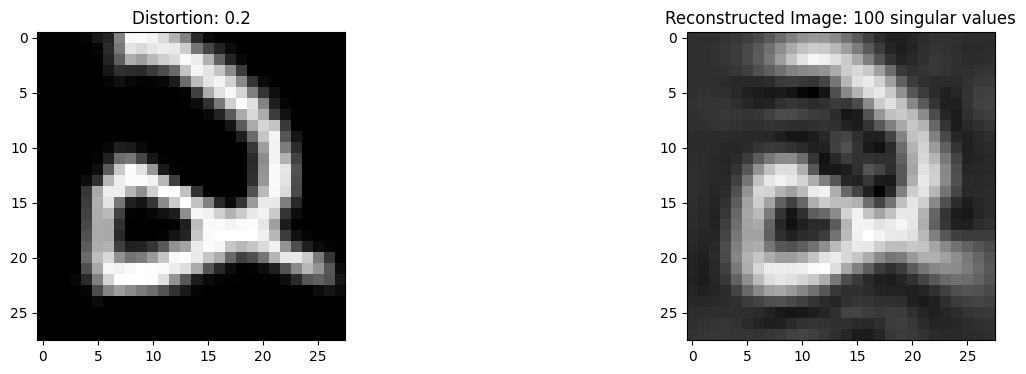

In [135]:
plot_reconstructed_images(transformed_images_0_2[0], U_fish_0_2, E_fish_0_2, V_t_fish_0_2, 0.2, 100)

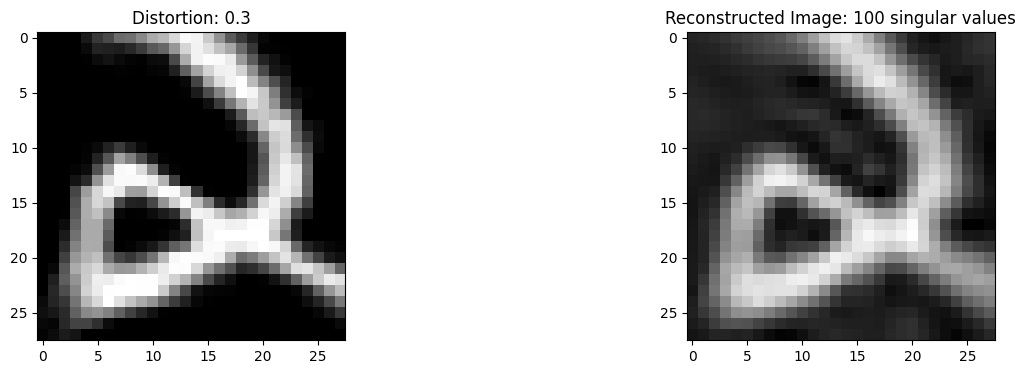

In [140]:
plot_reconstructed_images(transformed_images_0_3[0], U_fish_0_3, E_fish_0_3, V_t_fish_0_3, 0.3, 100)

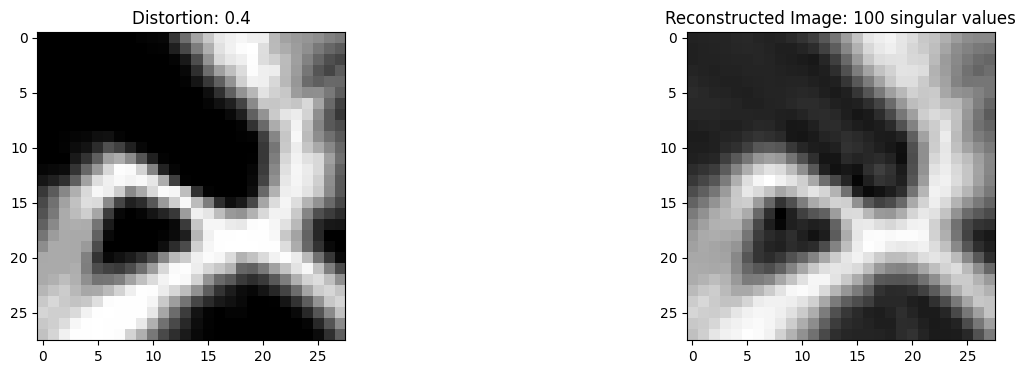

In [138]:
plot_reconstructed_images(transformed_images_0_4[0], U_fish_0_4, E_fish_0_4, V_t_fish_0_4, 0.4, 100)

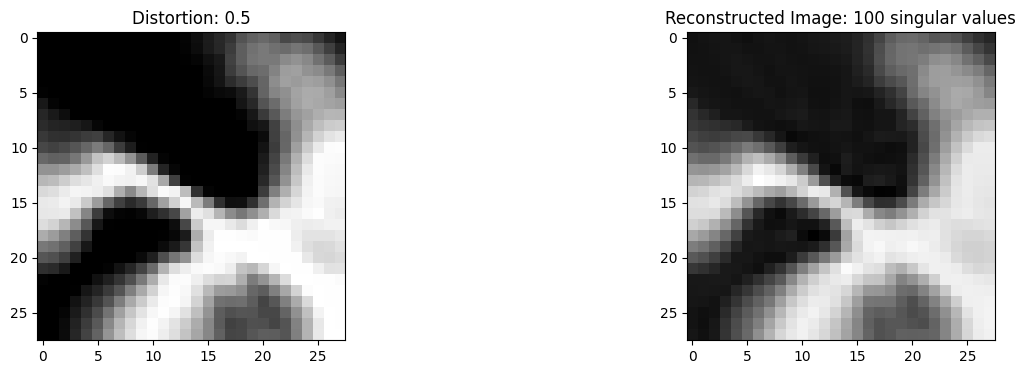

In [141]:
plot_reconstructed_images(transformed_images_0_5[0], U_fish_0_5, E_fish_0_5, V_t_fish_0_5, 0.5, 100)